In [1]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import pandas as pd 
import six


In [2]:
# Instantiates a client
client = language.LanguageServiceClient()

# The text to analyze
text = u'Hello, world!'
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(document=document).document_sentiment

print('Text: {}'.format(text))
print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))

Text: Hello, world!
Sentiment: 0.30000001192092896, 0.30000001192092896


In [3]:
def category_text(text):
    """Classifies content categories of the provided text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')
    
    #print(type(text.encode('utf-8')))
    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)
    
    try: 
        categories = client.classify_text(document).categories
    except:
        categories = []
    
    return categories
'''    
    #print(type(categories))
    if  type(categories) == "google.protobuf.pyext._message.RepeatedCompositeContainer" :
        for category in categories:
            print(category['name'])
'''    
    

'    \n    #print(type(categories))\n    if  type(categories) == "google.protobuf.pyext._message.RepeatedCompositeContainer" :\n        for category in categories:\n            print(category[\'name\'])\n'

In [4]:
def entities_text(text):
    """Detects entities in the text."""
    client = language.LanguageServiceClient()

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client.analyze_entities(document).entities

    # entity types from enums.Entity.Type
    entity_type = ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')
    '''
    for entity in entities:
        print('=' * 20)
        print(u'{:<16}: {}'.format('name', entity.name))
        print(u'{:<16}: {}'.format('type', entity_type[entity.type]))
        print(u'{:<16}: {}'.format('metadata', entity.metadata))
        print(u'{:<16}: {}'.format('salience', entity.salience))
        print(u'{:<16}: {}'.format('wikipedia_url',
              entity.metadata.get('wikipedia_url', '-')))
    '''
    return entities

In [5]:
courses = pd.read_csv("../data/syllabus.csv", engine='python')
#courses.set_index('ID', inplace=True)
courses['category'] =''
courses['entity_type'] =''
courses['entity_name'] =''
courses.head()

,ID,Name,Description,Instructor,category,entity_type,entity_name
0,590DV,Data Visualization,This course is designed to give practical advi...,Matthew Turk,,,
1,590DW,Data Warehousing and BI,SCOPE AND OBJECTIVES\n� Building a data wareho...,Michael Wonderlich,,,
2,590ED1,Exhibit Design & Installation,This course meets the first 8 weeks of the sem...,Walter Wilson,,,
3,590ED2,Exhibit Design & Installation,This course meets the last 8 weeks of the seme...,Walter Wilson,,,
4,590ELO,E-Learning,2 or 4 credits: Provides an introduction to a ...,Melissa Wong,,,


In [6]:
def get_category_list(text_data):
    category=category_text(text_data)
    category_list =[]
    
    #print(category)
        
    for cat in category:
        #if cat.confidence > 0.50:
        category_list.append(cat.name)
    
    return category_list
    
    

In [7]:
def get_entity_list(text_data):
    entities=entities_text(text_data)
    entities_list =[]
    entity_type = []
    #print(category)
    
    # entity types from enums.Entity.Type
    entity_enum= ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')    
    for entity in entities:
        #if cat.confidence > 0.50:
        entities_list.append(entity.name)
        #print(entity_enum[entity.type])
        entity_type.append(entity_enum[entity.type])
    return entities_list, entity_type

In [8]:
#get_entity_list(courses["Description"][0])

In [9]:
for i in courses.index:
    desc = courses.loc[i]['Description']
    #print(desc)
    cat_list = get_category_list(desc)
    ent_list,ent_type = get_entity_list(desc)
    #print(cat_list)
    courses.loc[i]['category'] = cat_list
    courses.loc[i]['entity_type'] = ent_type
    courses.loc[i]['entity_name'] = ent_list
    

In [10]:
#courses

In [11]:
courses.to_csv('../data/syllabus_category.csv')

In [12]:
courses_cat = courses 
new_df = courses

In [13]:
gen_cat = ['Course Information','Class Schedule Information', 'fee', 'fees','Meets','students','Laptop','data','text'
           ,'libraries','Focuses','introduction' ,'Prerequisite','information',
           'Consideration', 'settings', 'responsibilities', 'Class materials fee','credit',
           'credits','Class Schedule.','field trip fee','course','others','INFO','topics courses',
           'INFO 491','CPSC 491','standing','project', 'use','uses','people','selection',
          'AU','needs', 'interests','outreach','overview','practice','content','portion',
          'curriculum','parts','look','part','sections', 'Variety', 'perspective', 'course materials fee']

In [14]:
for ind in courses.index:
    ent_list = courses.loc[ind]["entity_name"]
    new_list = []
    for e in ent_list:
        if e not in gen_cat:
            new_list.append(e)
    new_df.loc[ind]['entity_name'] = new_list
    #print(new_list)

In [15]:
#course_cat = pd.read_csv('../data/desc_category.csv')
len(courses)

graph_df = pd.DataFrame(data=None, columns=['Course1', 'Course2','Common Entities'])


In [16]:
for i in courses.index:
    cid1= new_df.loc[i]['ID']
    a = set(new_df.loc[i]["entity_name"])
    a_minus_gen_cat = a.difference(set(gen_cat))
    
    
    for j in range(i+1,len(courses) ):
        cid2 = new_df.loc[j]['ID']
        
        b = set(new_df.loc[j]["entity_name"])
        common = a_minus_gen_cat.intersection(b)
        if len(list(common)) != 0 :
            temp= pd.DataFrame([[cid1,cid2,list(common)]], columns=graph_df.columns)
            graph_df = graph_df.append(temp, ignore_index=True,verify_integrity=False)
        #print(temp.columns)
    #print(graph_df)
    #break
        
        
        

In [19]:
graph_df.to_csv('Graph_syllabus.csv')

In [32]:
import networkx as nx 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 

%matplotlib inline

In [35]:
rand_idx = np.random.randint(0,len(graph_df),size=100)
rand_idx

array([ 633,  205, 3083, 1716,  161, 2931, 1364, 3773,   69, 1899, 3703,
       4008, 2649, 3075,  341, 1357, 4043, 3810, 1546, 1541, 1973, 3027,
       3964, 4313, 2563, 3763, 4223,  513,  707, 2494, 1972, 3857, 2608,
       2821, 3045, 1754, 1598, 2500, 4161, 4012, 1049, 3346, 2207,  879,
       3791, 4019, 3099, 1406,  190, 1674, 2819, 4039, 4208,  882,  740,
        906,  770, 3632, 4001, 2892, 1352,  685, 3938, 1950, 3045, 1941,
       1650, 2510, 3319, 3528, 1265, 3913, 2054,    8, 2305, 4023, 2721,
       2051, 2848, 3412,  808, 1923,  379,  918,  151, 3574, 2400, 2690,
       3860, 1545, 4288, 3297,  546, 2642, 1861, 1448, 2216,  419, 3366,
        692])

In [38]:
#A = graph_df['Course2'].isin(['490DB','490DT','590DV'])
A=graph_df.loc[rand_idx]

In [76]:
#G = nx.from_pandas_dataframe(graph_df[A] ,'Course1','Course2')
G = nx.from_pandas_dataframe(graph_df ,'Course1','Course2')

In [77]:
def dict_to_values(G, dict_data):
    return [dict_data[n] for n in G.nodes]

In [78]:
graph_df.head()

,Course1,Course2,Common Entities
0,590DV,590GE,[Students]
1,590DV,590GEO,[Students]
2,590DV,590ISO,[concepts]
3,590DV,590MD,[methods]
4,590DV,590PBO,[understanding]


In [79]:
def plot_network(G, node_size_dict, factor=10, **kwargs):
    nx.draw(
        G, 
        pos=nx.spring_layout(G),
        with_labels=True,
        node_size=[v*factor for v in dict_to_values(G, node_size_dict)],
        **kwargs
    )

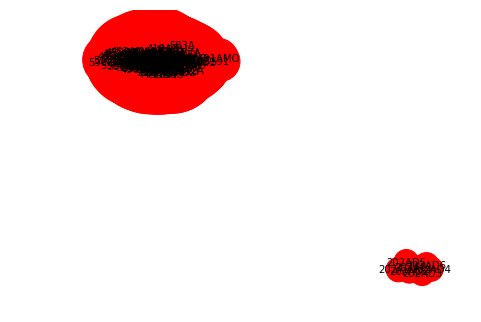

In [80]:
plot_network(G,nx.degree(G),factor=100,font_size=10, node_color="r", width=.25)


In [81]:
### Centrality Measure
from utilities import get_all_node_metrics

cent_measure= {'degree': nx.degree(G),
               'betweenness': nx.betweenness_centrality(G),
               'closeness'  : nx.closeness_centrality(G)
              }

df_cm = get_all_node_metrics(G)

In [82]:
df_cm.head()

,degree,betweenness,closeness,eigenvector,clustering
590DV,0.528571,0.005548,0.658073,0.093774,0.626435
590GE,0.750000,0.011927,0.784783,0.127267,0.558425
590GEO,0.750000,0.011927,0.784783,0.127267,0.558425
590ISO,0.578571,0.006419,0.682973,0.099858,0.589815
590MD,0.621429,0.008491,0.705866,0.103520,0.549853


In [132]:
e = G.node
s_G = A[:75]["Course1"].values.tolist()

In [133]:
H = G.subgraph(s_G)

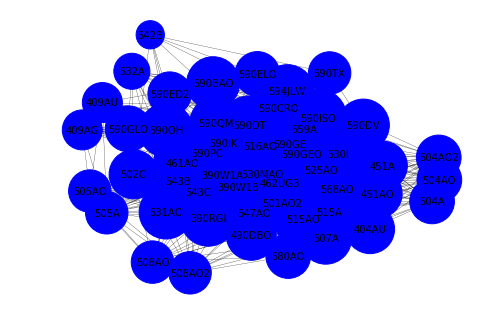

In [134]:
plot_network(H,nx.degree(H),factor=100,font_size=10, node_color="b", width=.25)

In [137]:
df_cm = get_all_node_metrics(H)
df_cm.sort_values(by=['degree'], axis=0)

,degree,betweenness,closeness,eigenvector,clustering
542B,0.156863,0.001076,0.542553,0.035954,0.392857
532A,0.254902,0.001249,0.573034,0.062938,0.679487
409AU,0.313725,0.002021,0.593023,0.080270,0.716667
409AG,0.313725,0.002021,0.593023,0.080270,0.716667
508AO2,0.352941,0.002474,0.607143,0.087422,0.732026
508AO,0.352941,0.002474,0.607143,0.087422,0.732026
590TX,0.352941,0.002629,0.607143,0.097797,0.830065
505A,0.352941,0.004484,0.607143,0.082749,0.607843
505AO,0.352941,0.004484,0.607143,0.082749,0.607843
590ED2,0.372549,0.002365,0.614458,0.099140,0.760234
